# APS 2 - Transferências de calor e mecânica dos sólidos:
### Integrantes:
    - Carolina Hirschheimer
    - Natália Carreras
    - Rafael Libertini
    - Rodrigo Nigri

## Definição do problema:
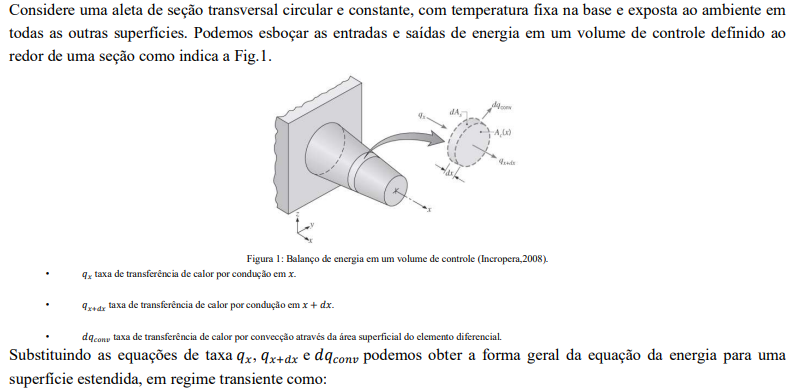
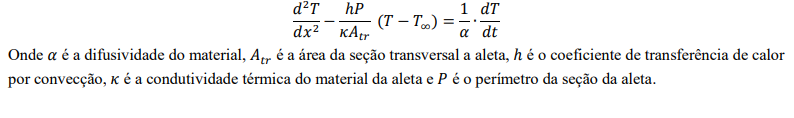


### Exercício 1:
Aplique os conceitos do método das diferenças finitas na equação diferencial do problema para definir uma equação de diferença algébrica associada aos nós da aleta. Considere para a segunda derivada da temperatura no espaço uma equação de diferença finita centrada e para a primeira derivada no tempo da temperatura uma equação de diferença progressiva. Apresente o desenvolvimento das equações. 

### Exercício 2: 
Apresente um gráfico (𝑇𝑒𝑚𝑝𝑒𝑟𝑎𝑡𝑢𝑟𝑎 × 𝑝𝑜𝑠𝑖çã𝑜) após obter o regime permanente. Use uma tolerância de 𝑡𝑜𝑙 = 1 ∙ 10^-10. Considere que a aleta, de comprimento 𝐿 = 300𝑚𝑚 , densidade de 2700 𝑘𝑔/𝑚³ , condutividade térmica de 180 𝑊/(𝑚𝐾) e calor específico 896𝐽/(𝑘𝑔𝐾), tem a temperatura especificada na extremidade de 𝑇(𝐿) = 25℃. A aleta está em contato com uma base a 𝑇b = 100℃ em um ambiente a 𝑇inf = 50℃ e ℎ = 50𝑊/𝑚^2𝐾. Para a condição de estabilidade do procedimento numérico use 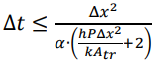

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [9]:
# Dados do material: densidade do material, calor específico, condutividade térmica.
# Dados do ambiente: coeficiente de transferência por convecção, temperatura do fluido.
# Dados do dissipador: temperatura da base, raio, comprimento.
# Dados do modelo numérico: Δ𝑥, tempo total da simulação.
# A função deve retornar: Um gráfico (𝑇𝑒𝑚𝑝𝑒𝑟𝑎𝑡𝑢𝑟𝑎 × 𝑝𝑜𝑠𝑖çã𝑜) com o resultado numérico. Um gráfico (𝑇𝑒𝑚𝑝𝑒𝑟𝑎𝑡𝑢𝑟𝑎 × 𝑝𝑜𝑠𝑖çã𝑜) com o resultado analítico. Use legendas e indique as unidades usadas. 



def temp_graph(density, sp_heat, thermal_k, convec_h, fluid_t, base_t, r, L, delta_x, t_total, delta_t):
    
    points_n = int(L/delta_x) + 1
    time_n = int(t_total/delta_t) + 1
    T = np.zeros((time_n, points_n))
    
    alpha = 1
    D = 2*r
    A_tr = math.pi * (D**2) / 4
    cte = ((convec_h * math.pi*D) /(thermal_k * A_tr )) * (base_t - fluid_t)
    
    for i in range(1,time_n):
        for x in range(0,points_n):
            T[i:L+1] = alpha*delta_t * ((1 /(delta_x**2)) * T[i+1:x] - (2*T[i:x]) + T[i-1:x] - cte ) + T[i:x]
        plt.plot(T[0:],range(0,points_n))
    return T


In [10]:
r = 1 #  ???
delta_x = 1e-4
delta_t = 1e-3
temp_graph(2700, 869, 180, 50, 50, 100, r, 0.03,delta_x, 100, delta_t)

TypeError: slice indices must be integers or None or have an __index__ method

### Exercício 3: 
Para validar os resultados obtidos com o software desenvolvido, apresente um gráfico (𝑇𝑒𝑚𝑝𝑒𝑟𝑎𝑡𝑢𝑟𝑎 × 𝑝𝑜𝑠𝑖çã𝑜) para o comportamento analítico da temperatura na aleta usando as mesmas condições definidas no item anterior.